In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl

import requests

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

mpl.rcParams["axes.unicode_minus"]= False

In [3]:
train= pd.read_csv("201901-202003.csv")
train.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [3]:
table = pd.pivot_table(train, index = ["CARD_SIDO_NM","STD_CLSS_NM"], values="AMT", aggfunc = 'sum')
a =table.query('STD_CLSS_NM== ["한식 음식점업"]')
b= a.sort_values(by ="AMT",ascending =False)

b

,,AMT
CARD_SIDO_NM,STD_CLSS_NM,
경기,한식 음식점업,3325555768235
서울,한식 음식점업,2999269686135
부산,한식 음식점업,1110797367838
경남,한식 음식점업,868903285921
대구,한식 음식점업,741676218433
인천,한식 음식점업,690480390079
경북,한식 음식점업,601238978060
충남,한식 음식점업,455818789615
광주,한식 음식점업,437997793732


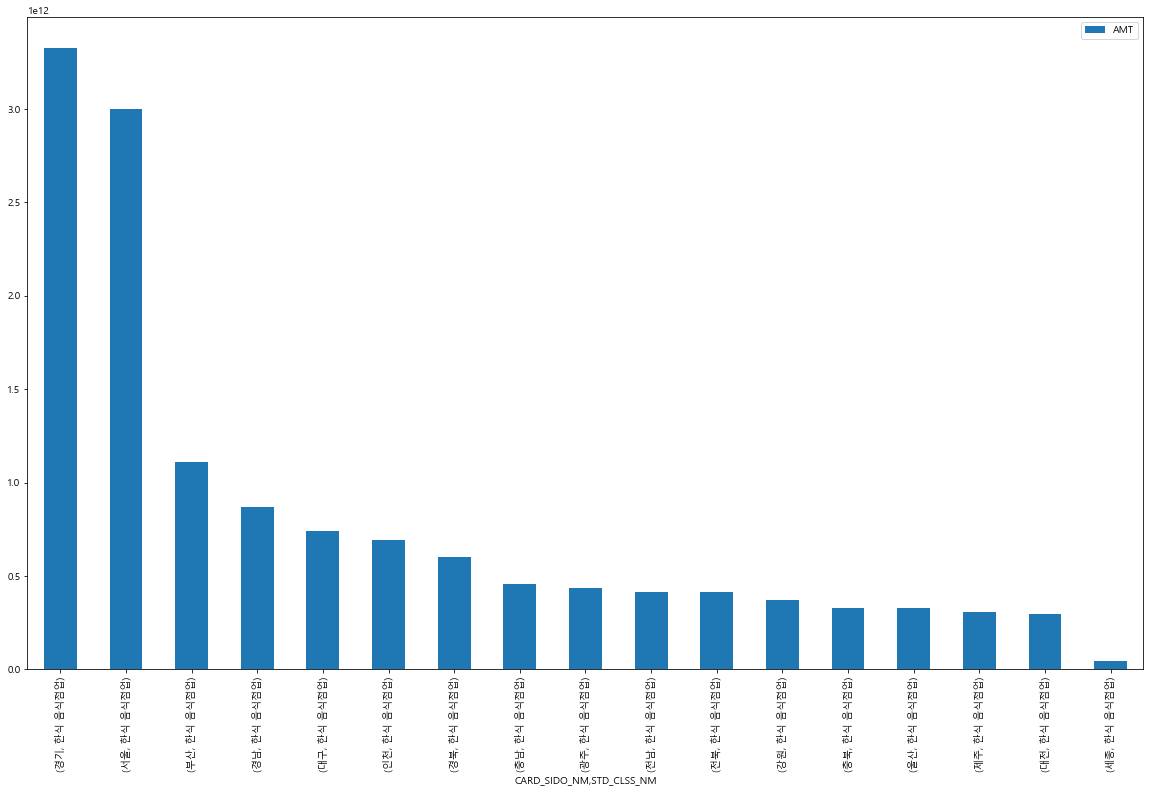

In [4]:
b.plot(kind='bar',stacked=True,figsize=[20,12])

In [3]:
std_list = train["STD_CLSS_NM"].unique()
sido_list = train["CARD_SIDO_NM"].unique()
print(std_list)
print(sido_list)

['건강보조식품 소매업' '골프장 운영업' '과실 및 채소 소매업' '관광 민예품 및 선물용품 소매업'
 '그외 기타 스포츠시설 운영업' '그외 기타 종합 소매업' '기타 대형 종합 소매업' '기타 외국식 음식점업' '기타 주점업'
 '기타음식료품위주종합소매업' '마사지업' '비알콜 음료점업' '빵 및 과자류 소매업' '서양식 음식점업' '수산물 소매업'
 '슈퍼마켓' '스포츠 및 레크레이션 용품 임대업' '여관업' '욕탕업' '육류 소매업' '일반유흥 주점업' '일식 음식점업'
 '전시 및 행사 대행업' '중식 음식점업' '차량용 가스 충전업' '차량용 주유소 운영업' '체인화 편의점'
 '피자 햄버거 샌드위치 및 유사 음식점업' '한식 음식점업' '호텔업' '화장품 및 방향제 소매업' '휴양콘도 운영업' '여행사업'
 '자동차 임대업' '면세점' '버스 운송업' '택시 운송업' '기타 수상오락 서비스업' '내항 여객 운송업'
 '그외 기타 분류안된 오락관련 서비스업' '정기 항공 운송업']
['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']


In [4]:
len(empty_sido_std)

NameError: name 'empty_sido_std' is not defined

In [5]:
#TEST DISPLAY
empty_sido_std = [] #비어있어있는 시도, 품목 LIST
frames = [] #각 시도 품목별 DF추가
for sido in sido_list:
    for std in std_list:
        check_df = pd.pivot_table(train[train["CARD_SIDO_NM"]==sido], index = ["CARD_SIDO_NM","STD_CLSS_NM","REG_YYMM"],values="AMT", aggfunc = 'sum').query('STD_CLSS_NM== ["'+std+'"]')
        #display(check_df)
        if(check_df.empty): #DF가 비어있을 때
            empty_sido_std.append([sido, std]) #비어있음            
        frames.append(check_df) #품목별 DF List로 만들기
#         result = pd.concat(frames).to_csv('C:\\Users\\acorn\\Desktop\\시도별csv\\' + sido + '.csv', encoding='euc-kr') #품목별 DF 합치기#시도별 csv파일저장
    print(sido, "완료")
    frames.clear() #list 초기화
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
#table = pd.pivot_table(train[train["CARD_SIDO_NM"]=="서울"], index = ["CARD_SIDO_NM","STD_CLSS_NM","REG_YYMM"],values="AMT", aggfunc = 'sum')
#s_fruit = table.query('STD_CLSS_NM== ["과실 및 채소 소매업"]')
#s_fruit

강원 완료
경기 완료
경남 완료
경북 완료
광주 완료
대구 완료
대전 완료
부산 완료
서울 완료
세종 완료
울산 완료
인천 완료
전남 완료
전북 완료
제주 완료
충남 완료
충북 완료


## 서울

In [49]:
table = pd.pivot_table(train[train["CARD_SIDO_NM"]=="서울"], index = ["CARD_SIDO_NM","STD_CLSS_NM","REG_YYMM"],values="AMT", aggfunc = 'sum')
s_fruit = table.query('STD_CLSS_NM== ["과실 및 채소 소매업"]')
s_fruit

AMT
CARD_SIDO_NM STD_CLSS_NM REG_YYMM            
서울           과실 및 채소 소매업 201901    7781224692
                         201902    7026375331
                         201903    6741351102
                         201904    6759215536
                         201905    6814174470
                         201906    6834977755
                         201907    6185097273
                         201908    6523895442
                         201909    8612224832
                         201910    7182031932
                         201911    7658582554
                         201912    7657836158
                         202001    9995267772
                         202002    6553427609
                         202003    8005379734

In [53]:
table = pd.pivot_table(train[train["CARD_SIDO_NM"]=="서울"], index = ["CARD_SIDO_NM","STD_CLSS_NM"],columns="REG_YYMM",values="AMT", aggfunc = 'sum')



# grocery shopping

s_fruit = table.query('STD_CLSS_NM== ["과실 및 채소 소매업"]')
s_butcher_s = table.query('STD_CLSS_NM== ["육류 소매업"]')
s_fish_s = table.query('STD_CLSS_NM== ["수산물 소매업"]')
s_supermarket = table.query('STD_CLSS_NM== ["슈퍼마켓"]')
s_other_supermarket_s = table.query('STD_CLSS_NM== ["기타음식료품위주종합소매업"]')
s_chain_conven = table.query('STD_CLSS_NM== ["체인화 편의점"]')

#외식 산업

s_korean_rst = table.query('STD_CLSS_NM== ["한식 음식점업"]')
s_chiness_rst = table.query('STD_CLSS_NM== ["중식 음식점업"]')
s_sushi_rst = table.query('STD_CLSS_NM== ["일식 음식점업"]')
s_foregin_rst = table.query('STD_CLSS_NM== ["서양식 음식점업"]')
s_others_foreign_rst = table.query('STD_CLSS_NM== ["기타 외국식 음식점업"]')
s_fastfood_rst = table.query('STD_CLSS_NM== ["피자 햄버거 샌드위치 및 유사 음식점업"]')

s_nonalchol = table.query('STD_CLSS_NM== ["비알콜 음료점업"]')
s_bread = table.query('STD_CLSS_NM== ["빵 및 과자류 소매업"]')

# 유흥

s_bars = table.query('STD_CLSS_NM== ["일반유흥 주점업"]')
s_other_alchol = table.query('STD_CLSS_NM== ["기타 주점업"]')


#health
s_health_food = table.query('STD_CLSS_NM== ["건강보조식품 소매업"]')
s_golf = table.query('STD_CLSS_NM== ["골프장 운영업"]')

#sports
s_other_sports_complex = table.query('STD_CLSS_NM== ["그외 기타 스포츠시설 운영업"]')
s_sport_rent = table.query('STD_CLSS_NM== ["스포츠 및 레크레이션 용품 임대업"]')

# recreation

s_others_watersports_rec = table.query('STD_CLSS_NM== ["기타 수상오락 서비스업"]')
s_others_rec = table.query('STD_CLSS_NM== ["그외 기타 분류안된 오락관련 서비스업"]')
s_massage = table.query('STD_CLSS_NM== ["마사지업"]')
s_sauna = table.query('STD_CLSS_NM== ["욕탕업"]')
s_exhibitnevent_rec = table.query('STD_CLSS_NM== ["전시 및 행사 대행업"]')

# travel
s_travel_business = table.query('STD_CLSS_NM== ["여행사업"]')
s_souvenir= table.query('STD_CLSS_NM== ["관광 민예품 및 선물용품 소매업"]')
s_condonium = table.query('STD_CLSS_NM== ["휴양콘도 운영업"]')
s_dutyfree = table.query('STD_CLSS_NM== ["면세점"]')

# accommodation

s_motel = table.query('STD_CLSS_NM== ["여관업"]')
s_hotel = table.query('STD_CLSS_NM== ["호텔업"]')

# transportation

s_bus = table.query('STD_CLSS_NM== ["버스 운송업"]')
s_taxi = table.query('STD_CLSS_NM== ["택시 운송업"]')


s_inland_boat_trans = table.query('STD_CLSS_NM== ["내항 여객 운송업"]')
s_airbus_trans = table.query('STD_CLSS_NM== ["정기 항공 운송업"]')



# 종합 기타

s_others_jh_s = table.query('STD_CLSS_NM== ["그외 기타 종합 소매업"]')
s_others_l_jh_s = table.query('STD_CLSS_NM== ["기타 대형 종합 소매업"]')
s_cosmetics = table.query('STD_CLSS_NM== ["화장품 및 방향제 소매업"]')
s_car_rent = table.query('STD_CLSS_NM== ["자동차 임대업"]')


#gas station

s_lpgstation = table.query('STD_CLSS_NM== ["차량용 가스 충전업"]')
s_gasstation = table.query('STD_CLSS_NM== ["차량용 주유소 운영업"]')

#------------------------------------------------------------------------------------------
display(
s_fruit,
s_butcher_s,
s_fish_s,
s_supermarket,
s_other_supermarket_s,
s_chain_conven,


#외식 산업

s_korean_rst,
s_chiness_rst,
s_sushi_rst,
s_foregin_rst,
s_others_foreign_rst,
s_fastfood_rst,

s_nonalchol,
s_bread,

# 유흥

s_bars,
s_other_alchol,


#health
s_health_food,
s_golf ,

#sports
s_other_sports_complex,
s_sport_rent,

# recreation

s_others_watersports_rec,
s_others_rec,
s_massage ,
s_sauna ,
s_exhibitnevent_rec ,

# travel
s_travel_business ,
s_souvenir,
s_condonium ,
s_dutyfree ,

# accommodation

s_motel ,
s_hotel,

# transportation

s_bus,
s_taxi,


s_inland_boat_trans,
s_airbus_trans,



# 종합 기타

s_others_jh_s,
s_others_l_jh_s,
s_cosmetics,
s_car_rent,

#gas station

s_lpgstation,
s_gasstation
)



# b= a.sort_values(by ="AMT",ascending =False)
# b


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,과실 및 채소 소매업,7781224692,7026375331,6741351102,6759215536,6814174470,6834977755,6185097273,6523895442,8612224832,7182031932,7658582554,7657836158,9995267772,6553427609,8005379734


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,육류 소매업,15298556936,15493864123,11660917856,11539996164,12267079064,12112907224,11541748086,11805338307,18579065265,11398511645,13337778771,14610904163,22045894029,12434621901,16014475439


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,수산물 소매업,3539054592,3273481140,2713613058,2627178557,2548626406,2240721118,1824154037,2021292351,3635240476,3257729316,3922056199,4563028934,4743524958,2911593854,3342043120


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,슈퍼마켓,84097660037,74908876637,81492738546,79974928689,83301979339,83379385699,82585455753,83404419694,84269526458,79500787881,77519701213,77685909107,85897722919,82350542471,95523095194


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,기타음식료품위주종합소매업,28643671323,23701540764,25728100227,25627105073,27377854896,26391168965,25862456988,25887890339,26221142403,24812797365,24847752595,23900636985,26699385013,24461195696,25422139867


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,체인화 편의점,80419748756,70559870044,87376373525,85138047676,95217998710,97734932884,96987810027,96774308485,94076824193,97146713691,87969799277,89182615571,83138872565,79927372749,81303456270


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,한식 음식점업,208167049908,177313154370,215161897702,203093299733,217699585791,208589282985,212431404887,208672680259,192700175009,211637760577,205181174159,230607576860,195557051983,164963398987,147494192925


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,중식 음식점업,18823781054,17235776548,20476576751,19375090820,20948803280,20130423252,20816727108,19992629697,18852662249,20105464237,19789222813,22798001276,19555086516,15135121429,13327780001


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,일식 음식점업,19683962203,16993051046,20668225201,19296781408,20862755599,20014050494,18613960798,17493381268,17172557401,19417793169,19058584447,23168297732,18324753256,15458828404,14155708402


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,서양식 음식점업,44144354639,39177595851,46294820641,43994753316,48069925093,46970978307,48272360286,48985514703,44676017724,47774494043,45079808251,54145045047,44391211660,37964210789,33691383982


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,기타 외국식 음식점업,11165712719,9302906544,11259256477,10630544207,10452371063,9765623174,10007657816,10019730103,9715836731,11132950154,10925983728,11943362277,10227871874,8453927037,7348439049


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,피자 햄버거 샌드위치 및 유사 음식점업,20309069355,18099710041,20570214952,20409511296,21434970653,20956475209,21519869842,21214073653,20182294853,20751458673,18951338360,21268384497,20194354446,17836902751,18715095314


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,비알콜 음료점업,29579626245,27338539187,32630743204,32518816454,35674752155,34409383827,35609443835,35507955873,33562746942,34044337764,31401746445,33796662599,31374583974,26852037378,26081176709


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,빵 및 과자류 소매업,15628677549,13870152218,16703248165,15769900054,15853188676,14541040813,14222307254,14243455851,14951890670,15224308029,14963353810,16361659423,14972758713,13561198153,14350083255


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,일반유흥 주점업,5435788120,4715154809,5901214640,5300592364,5824029715,5591776556,5699877049,5567815990,5308044187,5318540248,5155469326,6565420266,4987640581,4257150947,2897164720


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,기타 주점업,2158796004,1840192594,2165806644,2085082290,2173899175,2029211741,2109581196,2070644749,2064297248,2150326642,2025543207,2569622902,1980146234,1671356142,1463780040


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,건강보조식품 소매업,1987567326,1750362071,1355648850,1304819043,1572681449,1217096429,1192741943,1166273242,1601702368,1324009512,1162753664,1232595477,1616301243,1047848768,1178972099


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,골프장 운영업,91167430,171068380,336247755,414515592,503988683,456069210,405059380,322949130,299468590,427855850,457277375,238257150,157811310,195393150,364764050


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,그외 기타 스포츠시설 운영업,61005100,46179550,47294550,29056800,34460820,39022400,41449900,50165550,31838650,39143050,31512772,46309000,59947800,32793450,15888500


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,스포츠 및 레크레이션 용품 임대업,16604841096,17319358308,21568065533,21372274307,24552772091,21597528500,18956897012,16074966132,19655439887,21899869835,20751514060,19258229750,15430034693,12470910121,13713309096


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,기타 수상오락 서비스업,11379200,9682150,7368900,5632270,7294150,6138450,6383150,7282700,6455500,6962400,4357700,5532780,6681700,3383100,3946900


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,마사지업,250680704,245000691,305277832,283735086,313547296,326810608,330279846,329266136,325722248,303050059,301152659,326584859,285487775,188688609,144174546


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,욕탕업,3558037953,3216698418,3157982633,2622295316,2387382739,2037816313,2129419278,2043875321,2317597252,2463290401,2762520226,3591129938,3525638150,1795273388,1368908045


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,전시 및 행사 대행업,1091350782,919815413,1308898873,897680726,1127844276,1395540615,1110473374,1568655473,1430300655,1186615799,882982033,1385628418,1258419315,322336332,164414858


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,여행사업,12840218666,7751269022,7769629374,8116983889,8372266507,6883487293,10481345529,7258642551,6629369429,6479938070,6125067892,7773241199,7414562655,877906504,313930866


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,관광 민예품 및 선물용품 소매업,201789366,176790730,170600649,180278065,213614008,211424250,183828536,260639894,178736016,192694035,572148835,463598349,192847481,94222371,53586140


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,면세점,5401846272,3497229512,2726173304,2789966844,3169056287,3497177933,3815307259,2565166437,2225480182,2357957727,3084892022,4088519021,3523178503,513004925,35502010


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,여관업,4025389532,3175345125,3794820287,3609498691,3722881704,3773620223,3810525101,3818421960,3727660187,3675708184,3467741584,4010611120,3423862782,2724796947,2293624372


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,호텔업,11357183476,8974952430,8509627009,8566451767,10102553882,7863745682,8041218940,9730942943,7606589658,9747976802,8163722219,12352059973,11624492156,6434392384,3287206791


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,버스 운송업,15752052140,14521862390,16835819370,16536231080,17421136310,16705654490,9954498445,10017886310,8809683690,9165213130,8775379120,8824808290,8503076320,5465698490,2798198940


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,택시 운송업,97621455134,90745073191,101381770333,108539754279,111861517130,104341820599,119570073693,112120979935,113772906378,112458258931,107881108284,120097505600,107228563222,88931483150,78532125499


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,내항 여객 운송업,1547926322,1574965666,2101642805,2404287972,2713978020,2330575440,2455180535,3077452630,1962905980,2097674585,1754469765,1475326006,1550539107,1037749152,1103089720


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,정기 항공 운송업,35205057302,33217771222,35260274654,32769845517,32647343649,36616497728,40239859930,30384148360,28054038554,30786502072,29868670660,43533735266,31967557730,8346501214,2284378045


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,그외 기타 종합 소매업,40095873506,33091221248,35511697234,33746015890,38948606001,36383969376,36499975118,38486823271,39223872029,39485668953,43961600663,42786503471,40691021414,36521444764,40433017255


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,기타 대형 종합 소매업,109356444014,96300438740,106395710640,102329130078,110277082343,97650938284,103975178494,99794439556,102500953935,100989965491,99392629579,106078120047,103400012909,78946004069,85944403598


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,화장품 및 방향제 소매업,22777628706,19492787686,22520635955,20988287998,22640881348,21950603322,21033419576,20766404277,19287814315,20933675566,20545027693,19036026225,18623922321,17447976274,15531843111


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,자동차 임대업,324490455,289396524,324927720,306921498,356744391,384998998,441891769,501762751,324107495,364411116,334777087,309552731,213388564,148502469,144784043


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,차량용 가스 충전업,914023387,793589987,863878533,821868149,900890346,869724303,851806863,894041919,808628357,780637105,845239251,872491056,819779264,748373875,738081061


,REG_YYMM,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
CARD_SIDO_NM,STD_CLSS_NM,,,,,,,,,,,,,,,
서울,차량용 주유소 운영업,32715752794,29031763584,32827993882,33483401137,37508708736,36177684243,37333812796,40398961063,36825321389,37055923734,37231791791,37334862184,35974971160,31325106747,30213190867


In [24]:
# loc groupby 사용
t= train.loc[(train['CARD_SIDO_NM'] == '서울')].loc[train['STD_CLSS_NM'] == '한식 음식점업']
t[["STD_CLSS_NM",'REG_YYMM','AMT']].groupby(["STD_CLSS_NM",'REG_YYMM']).sum()

AMT
STD_CLSS_NM REG_YYMM              
한식 음식점업     201901    208167049908
            201902    177313154370
            201903    215161897702
            201904    203093299733
            201905    217699585791
            201906    208589282985
            201907    212431404887
            201908    208672680259
            201909    192700175009
            201910    211637760577
            201911    205181174159
            201912    230607576860
            202001    195557051983
            202002    164963398987
            202003    147494192925

AttributeError: 'Rectangle' object has no property 'figsize'

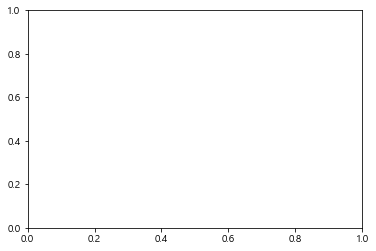

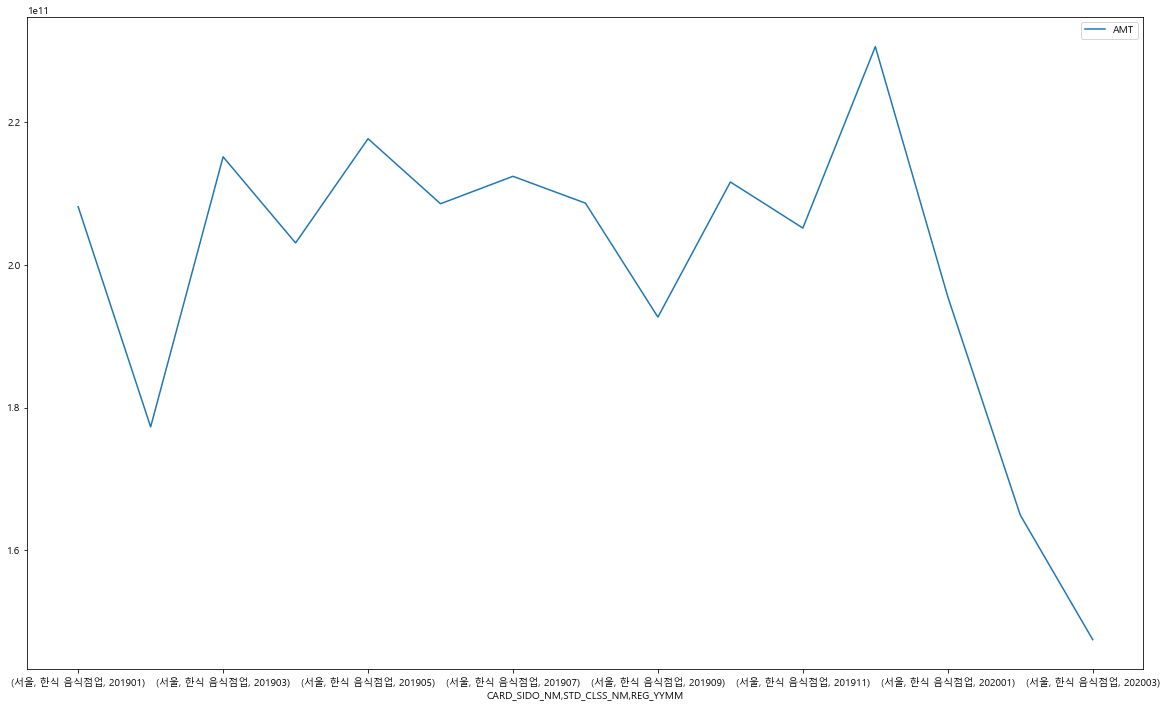

In [36]:
a.plot(figsize=[20,12])

In [ ]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 2x3으로 총 6개의 시각화를 한 화면에 띄웁니다.
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월, 일, 시, 분, 초 별 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)